# <font color="maroon"> Prediction of Car price using the concepts of Lasso Regression and Multiple Linear Regression using Recursive Feature Elimination </font>

# Step 1 : Importing and understanding the structure of the data

In [1]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing the dataset
car_price_data=pd.read_csv('CarPrice_Assignment.csv')
print(car_price_data.head())

#printing out number of rows and columns
shape=car_price_data.shape
print(color.BOLD + "There are " +str(shape[0])+ " rows  and "+str(shape[1])+" columns")

#printing out the datatypes and number of non-missing values
print(car_price_data.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

# Step 2: Pre-processing the data


* Handling the missing values,Dropping the unnecessary columns
* Type Casting
* Exploratory Data Analysis 
* Transforming the skewed variables
* Dummy coding the categorical variables
* Splitting the data
* Scaling the numerical variables in the training dataset as the range impact linear regression results

### <font color="maroon"> Handling the missing values,Dropping the unnecessary columns

In [3]:
#Creating a variable Company from the variable CarName
car_price_data['Company']=car_price_data.CarName.str.split(' ').str[0]

#Dropping the CarName and car_ID column
car_price_data.drop(columns=['CarName','car_ID'],inplace=True)

#There are some misspelt words in the data set
#Correcting the spellings of misspelt company names
car_price_data.Company.replace('maxda','mazda',inplace=True)
car_price_data.Company.replace('Nissan','nissan',inplace=True)
car_price_data.Company.replace('porcshce','porsche',inplace=True)
car_price_data.Company.replace('toyouta','toyota',inplace=True)
car_price_data.Company.replace('vokswagen','volkswagen',inplace=True)
car_price_data.Company.replace('vw','volkswagen',inplace=True)

#Replacing values of cylinder number
car_price_data.replace({'cylindernumber':{'two':2,
                                        'three':3,
                                        'four':4,
                                        'five':5,
                                        'six':6,
                                        'eight':8,
                                        'twelve':12}},inplace=True)


#Looking if there ae no duplicates in the columns
print(car_price_data.loc[car_price_data.duplicated()])
print(' ')
print(color.GREEN+'No columns are duplicated')

#Looking at columns with missing values
print(car_price_data.columns[car_price_data.isna().sum()!=0])
print(color.GREEN+'No columns have missing values')

Empty DataFrame
Columns: [symboling, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price, Company]
Index: []

[0 rows x 25 columns]
 
No columns are duplicated
Index([], dtype='object')
No columns have missing values


### <font color="maroon"> Type Casting

In [4]:
#Converting the column Symboling to categorical
car_price_data['symboling']=car_price_data['symboling'].astype('object')

#splitting the columns into numerical and categorical columns

numeric_cols_data=car_price_data.select_dtypes(include=['int64','float64'])
print(color.RED+'The quantitative variables are')
print(numeric_cols_data.columns)

print('')
print('#####################################################')
print('')

categorical_cols_data=car_price_data.select_dtypes(include=['object'])
print(color.GREEN+ 'The qualitative variables are')
print(categorical_cols_data.columns)


The quantitative variables are
Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

#####################################################

The qualitative variables are
Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'Company'],
      dtype='object')


## <font color="maroon"> Exploratory Data Analysis 

### Visualizing the distribution of the Target variable "Price of the car"

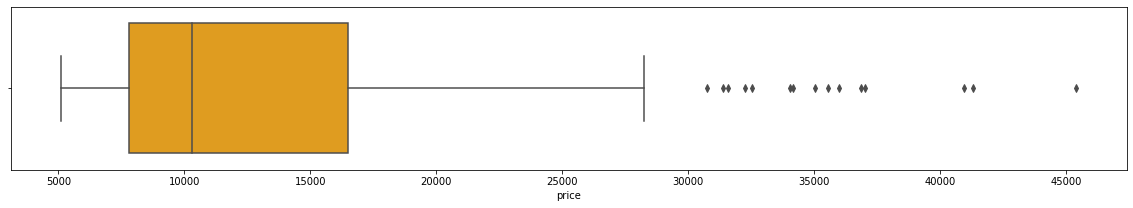

Looking at the prices above 25000. From looking at the data, we can say that these are the premium cars like bmw,jaguar


0        bmw
1     jaguar
2      buick
3    porsche
dtype: object

In [5]:
#Looking at the boxplot of the target variable
plt.figure(figsize = (20,3))
sns.boxplot(x = 'price', data = car_price_data,color="orange")
plt.show()

print(color.BOLD+'Looking at the prices above 25000. From looking at the data, we can say that these are the premium cars like bmw,jaguar')
pd.Series(car_price_data[car_price_data['price']>25000]['Company'].str.split(' ').str[0].unique())


## <font color="maroon" > Visualizing numeric variables 

* Looking at the skewness in the data

Most of the variables look like normally distributed.All the variables are normal except for ['cylindernumber', 'enginesize', 'compressionratio', 'price']


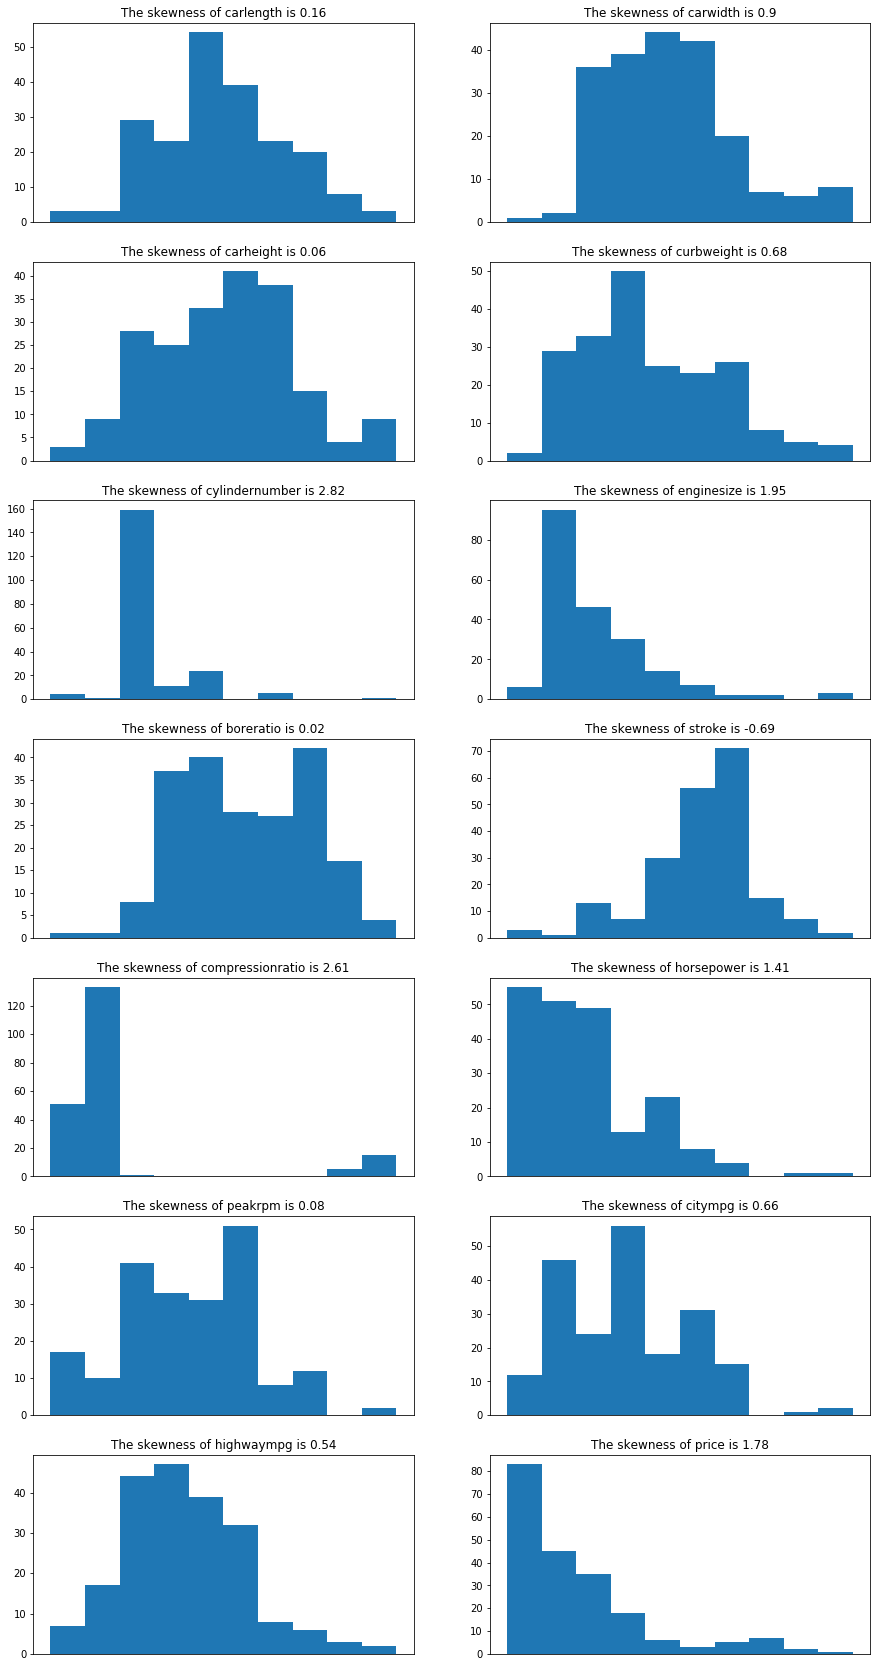

In [6]:
#plotting the variables of all the clusters
skewed_variables=[]

plt.figure(figsize=(15,30))
for i in range(0,len(numeric_cols_data.columns)-1):
    column_name=numeric_cols_data.columns[i+1]
    skewness=numeric_cols_data[column_name].skew(axis = 0, skipna = True)
    plt.subplot(7,2,i+1)
    plt.xticks([])
    plt.title('The skewness of ' +str(column_name) +' is ' +str(round(skewness,2)))
    plt.hist(numeric_cols_data[column_name])
    if( (skewness>1.5) or (skewness<-1.5)):
        skewed_variables.append(column_name)
        
if(len(skewed_variables)==0):    
    print(color.GREEN+'All the variables looks normally distributed')
else:
      print(color.RED+'Most of the variables look like normally distributed.All the variables are normal except for '+str(skewed_variables))

### Correlation Analysis

* Creating a correlation matrix to look at the issue of multi-collinearity ( correlation among the predictors). Correlation analysis is one of the methods used to decide which features affect the target variable the most, and in turn, get used in predicting this target variable. In other words, it’s a commonly-used method for feature selection in machine learning


(15.5, -0.5)

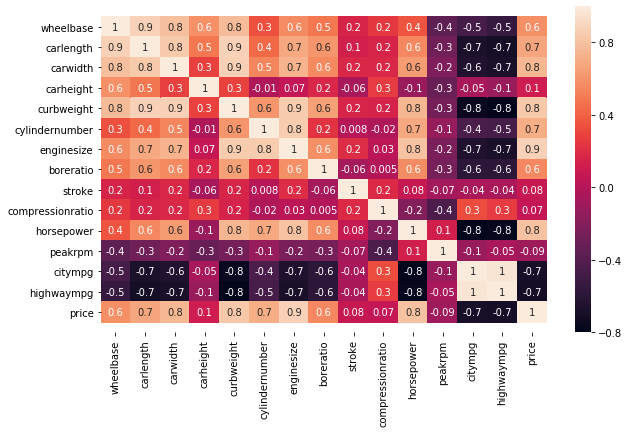

In [7]:
plt.figure(figsize = (10,6))
ax=sns.heatmap(numeric_cols_data.corr(), annot=True,fmt='.1g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top -1)

### Insights from the correlation analysis
* Target (Price of the car) is highly correlated with   carwidth,curbweight,enginesize,horsepower,mileage of the car.
        * Price is negatively correlated with the mileage 
        * Price is positively correlated with engine size,car width, car length
        
* Predictors share lots of variance among themselves (Multi-collinearity)
       For example, wheelbase is highly correlated with car length and car width. 
       Horse power is highly correlated with the mileage. 
       Highway mileage and city mileage have a correlation of 1. To handle this, a variable
       mileage can be created as an average of both


* Carheight, stroke, compressionratio, peakrpm  have very low correlation with target car price

In [11]:
#creating a mileage column which is an average of city mileage and highway mileage
car_price_data['mileage']=0.5*(car_price_data['citympg'] + car_price_data['highwaympg'] )

In [12]:
#dropping insignificant columns, city mileage, highway mileage from the correlation analysis
car_price_data.drop(columns=['carheight','compressionratio','peakrpm','stroke','citympg','highwaympg'],inplace=True)

## <font color="maroon"> Visualizing categorical variables 

In [13]:
#Function to plot the barchart of a categorical variable
#and number of observations within each level for that variable 

def barchart_freqcount(variable,fig):
    
    #Frequencyplot
    plt.subplot(10,2,fig)
    plt.title('Frequency plot of '+str(variable))
    sns.countplot(car_price_data[variable])
    
    #Boxplot
    plt.subplot(10,2,(fig+1))
    plt.title('Barchart of ' +str(variable)+ ' vs Price')
    sns.boxplot(x=car_price_data[variable], y=car_price_data.price)

The categorical variables are
Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'Company'],
      dtype='object')


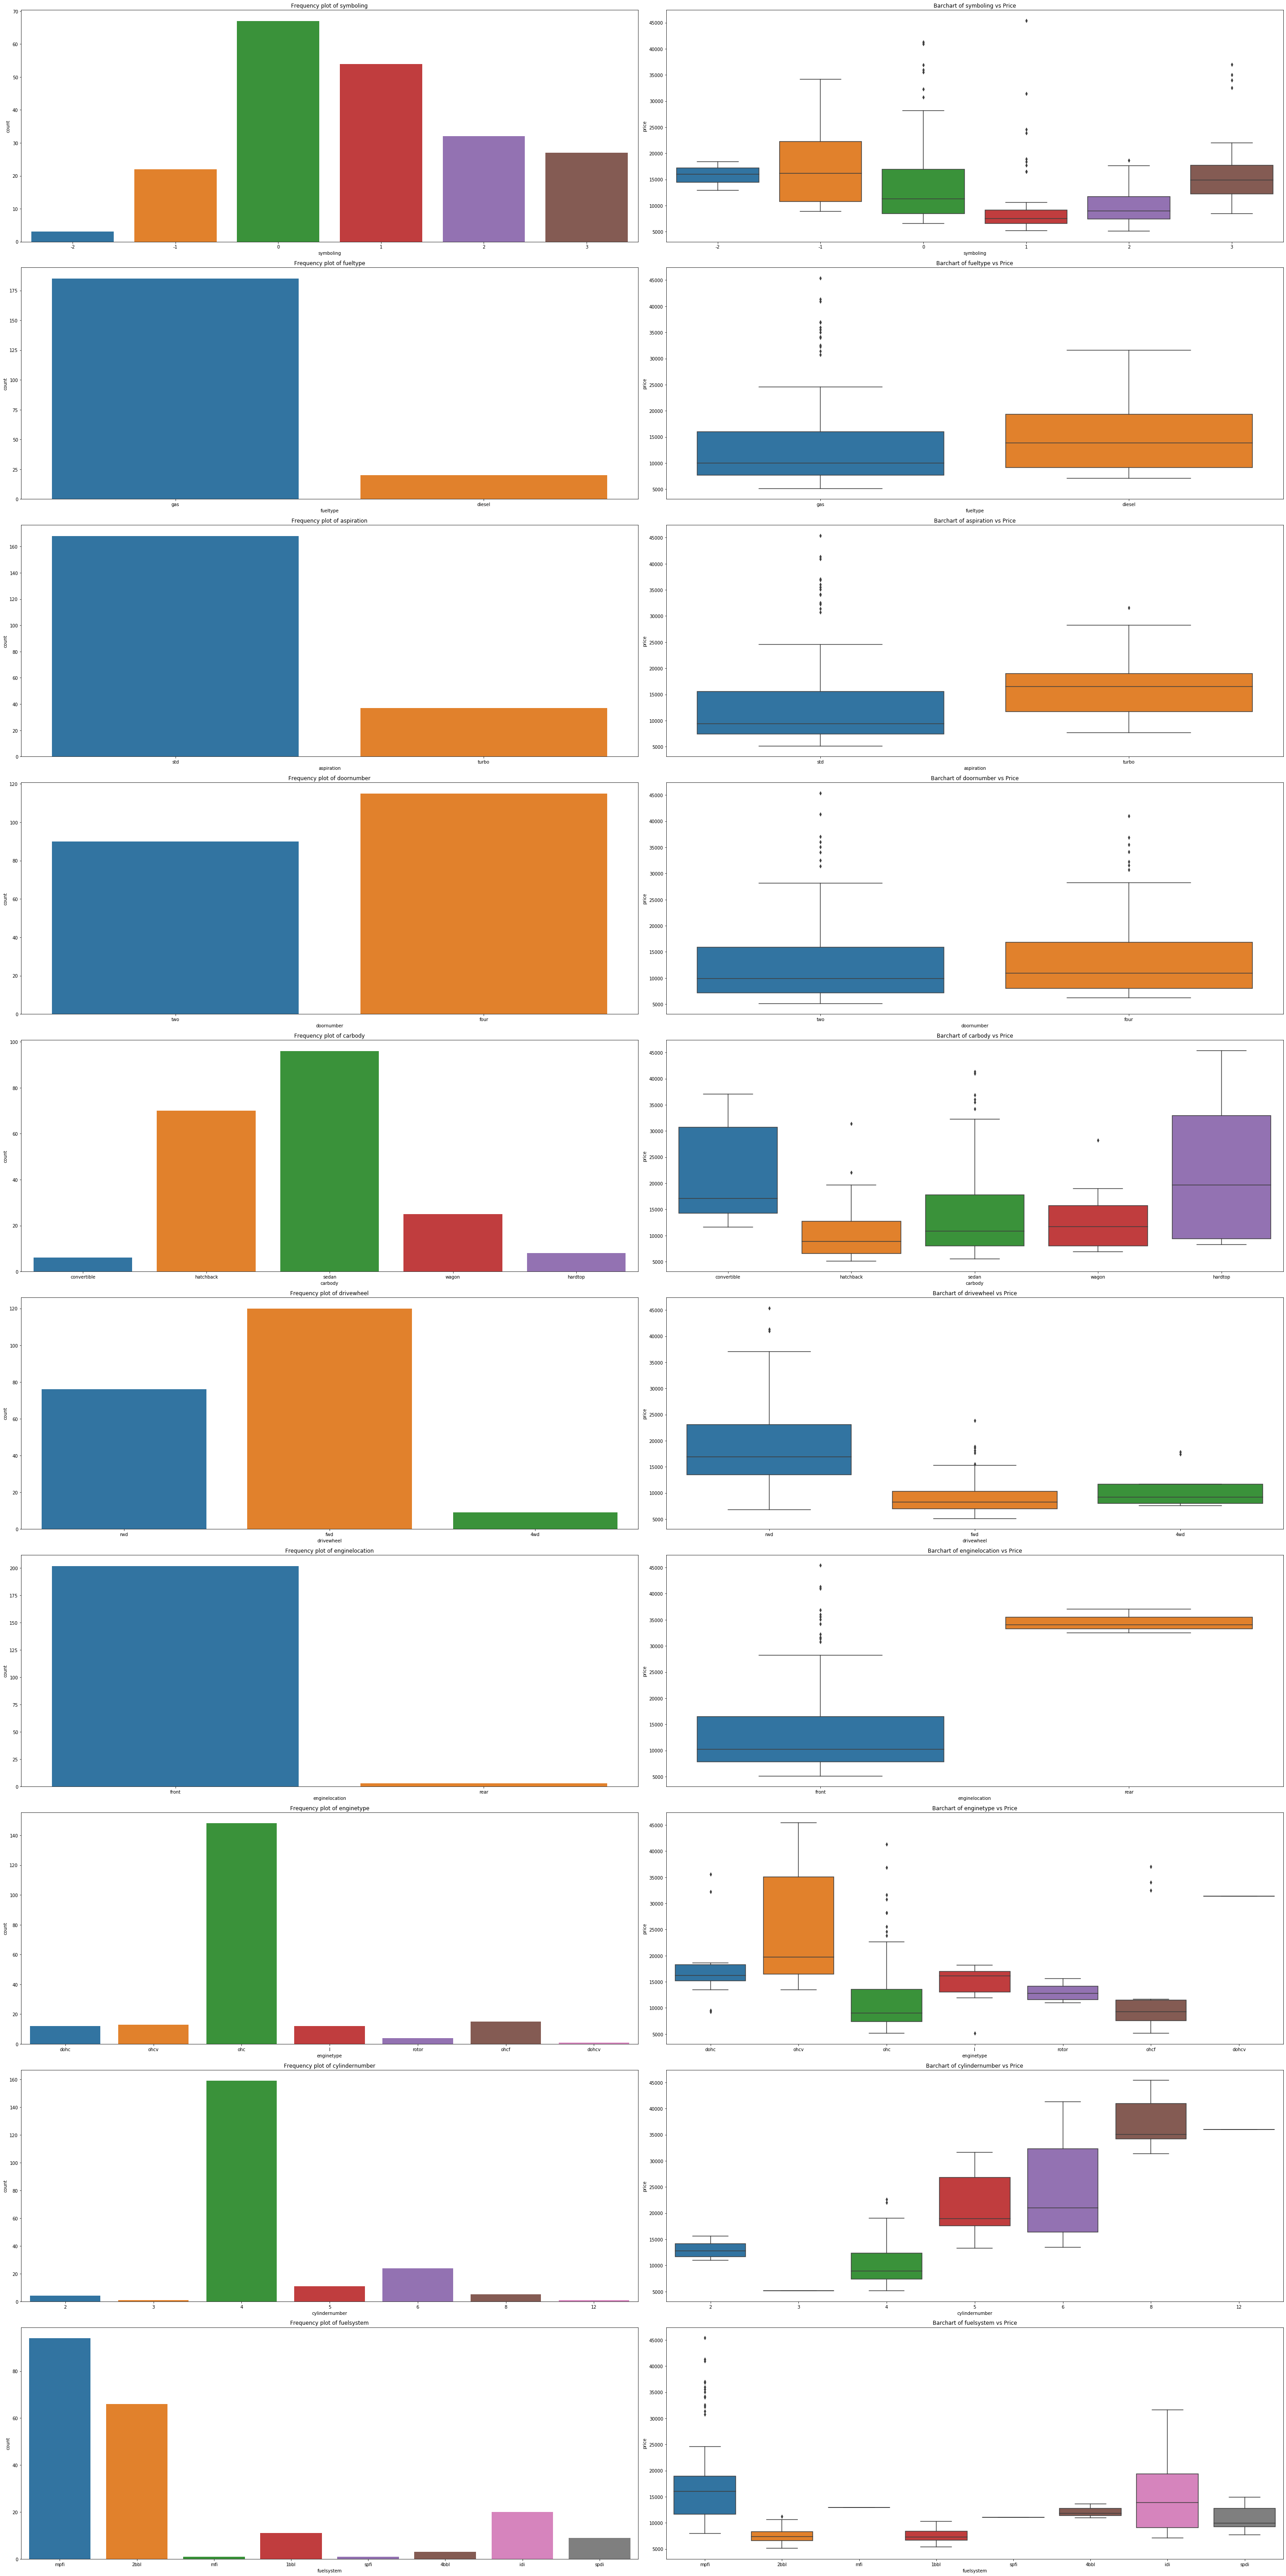

In [14]:
print(color.BOLD+ 'The categorical variables are')
print(categorical_cols_data.columns)

plt.figure(figsize=(40,80))
barchart_freqcount('symboling', 1)
barchart_freqcount('fueltype', 3)
barchart_freqcount('aspiration', 5)
barchart_freqcount('doornumber', 7)
barchart_freqcount('carbody', 9)
barchart_freqcount('drivewheel', 11)
barchart_freqcount('enginelocation', 13)
barchart_freqcount('enginetype', 15)
barchart_freqcount('cylindernumber',17)
barchart_freqcount('fuelsystem', 19)
plt.tight_layout()



### Highlights from the barcharts

* Diesel vehicles are more pricier when compared to cars which run on gas.Cars that use gas have 
  lower mean price when compared to the ones that use diesel.This is very intuituive because  
  generally trucks which use diesel are expensive when compared to the sedans

* As the number of cylinders increases, the price of the cars tend to go up

* Sports cars generally tend to have engine location on the rear side. Therefore cars with engine  
  located on the rear side are more pricier than others
  
* Cars with rear wheel drive are pricier which is completely intuitive

### Highlights from the frequency charts

* There are fewer observations for diesel fueltype to consider for analysis (DROP)
* There are fewer observations for rear engine location to consider for analysis (DROP)
* Convertible and Hardtop are the same type of car models which can be merged 
* We can group cylinder numbers as below 4 , 4 , 4-6 and above 6
* We can group all the levels into others except OHC in engine type
* Similarily, we can group levels of fuelsystem except mpfi,2bbl into others / Drop it
* Dropping symboling column

In [15]:
#Dropping the columns which are not useful for our analysis
car_price_data.drop(columns=['fueltype','enginelocation'],inplace=True)

In [16]:
#dropping column as it has many levels and not significant in the analysis
car_price_data.drop(columns=['symboling','fuelsystem'],inplace=True)

In [17]:
#replacing the value 'hardtop' with convertible
car_price_data.replace({'carbody':{'hardtop':'convertible'}},inplace=True)

In [18]:
#replacing the all values except ohc to others
car_price_data.replace({'enginetype':{'dohc':'others',
                                      'ohcv':'others',
                                      'l':'others',
                                      'rotor':'others',
                                      'ohcf':'others',
                                      'dohcv':'others'}},inplace=True)

In [341]:
# #replacing the all values  of fuel system except mpfi, 2bbl to others
# car_price_data.replace({'fuelsystem':{'mfi':'others',
#                                       '1bbl':'others',
#                                       'spfi':'others',
#                                       '4bbl':'others',
#                                       'idi':'others',
#                                       'spdi':'others'}},inplace=True)

In [19]:
#binning the number of cylinders column
car_price_data.replace({'cylindernumber':{2:'below 4',
                                      3:'below 4',
                                      5:'5 and 6',
                                      6:'5 and 6',
                                      8:'above 6',
                                      12:'above 6'}},inplace=True)

Visualizations after the grouping of levels


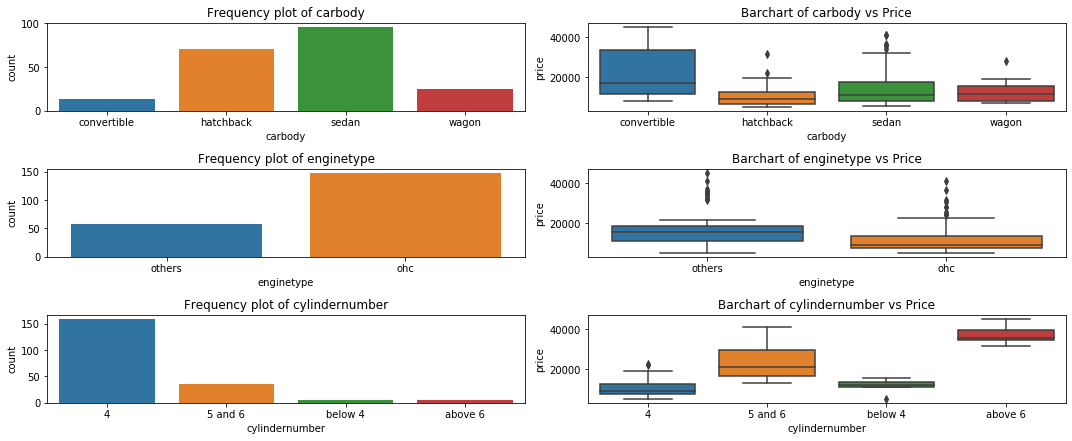

In [20]:
#Function to plot the barchart of a categorical variable
#and number of observations within each level for that variable 

def barchart_freqcount_new(variable,fig):
    
    #Frequencyplot
    plt.subplot(3,2,fig)
    plt.title('Frequency plot of '+str(variable))
    sns.countplot(car_price_data[variable])
    
    #Boxplot
    plt.subplot(3,2,(fig+1))
    plt.xaxis(off)
    plt.title('Barchart of ' +str(variable)+ ' vs Price')
    sns.boxplot(x=car_price_data[variable], y=car_price_data.price)
   
print(color.BOLD+color.RED+'Visualizations after the grouping of levels')
plt.figure(figsize=(15,20))
barchart_freqcount('carbody', 1)
barchart_freqcount('enginetype', 3)
barchart_freqcount('cylindernumber', 5)
plt.tight_layout()

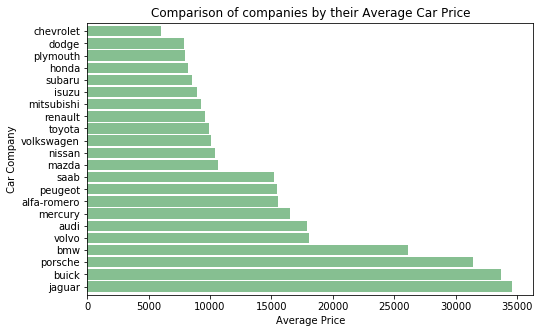

The Jauguars,Buicks have high price tags where chevrolet,dodge,honda tend to be less pricy
There are way too many companies. This might cause overfitting( dimensionality problem)
We can segment these companies into 3-4 levels


In [21]:
#Looking at the mean prices of car by company
Company_mean_prices=car_price_data.groupby(['Company'])['price'].mean().sort_values(ascending=False)
Company_mean_prices.plot(kind="barh",figsize=(8,5), color='#86bf91', zorder=2, width=0.85)
plt.title('Comparison of companies by their Average Car Price')
plt.xlabel('Average Price')
plt.ylabel(' Car Company ')
plt.show()
print('The Jauguars,Buicks have high price tags where chevrolet,dodge,honda tend to be less pricy')
print('There are way too many companies. This might cause overfitting( dimensionality problem)')
print('We can segment these companies into 3-4 levels')

In [22]:
#https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe
#Binning the Car Companies based on avg prices of each Company.
car_price_data['price'] = car_price_data['price'].astype('int')
temp = car_price_data.copy()
table = temp.groupby(['Company'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='Company')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
car_price_data['cars_range'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
car_price_data['cars_range']=car_price_data['cars_range'].astype('object')
#dropping company column
car_price_data.drop(columns=['Company'],inplace=True)

In [23]:
car_price_data.head()

,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,mileage,cars_range
0,std,two,convertible,rwd,88.6,168.8,64.1,2548,others,4,130,3.47,111,13495,24.0,Medium
1,std,two,convertible,rwd,88.6,168.8,64.1,2548,others,4,130,3.47,111,16500,24.0,Medium
2,std,two,hatchback,rwd,94.5,171.2,65.5,2823,others,5 and 6,152,2.68,154,16500,22.5,Medium
3,std,four,sedan,fwd,99.8,176.6,66.2,2337,ohc,4,109,3.19,102,13950,27.0,Medium
4,std,four,sedan,4wd,99.4,176.6,66.4,2824,ohc,5 and 6,136,3.19,115,17450,20.0,Medium


### <font color="maroon"> Transforming the skewed variables

***
Most of the data looks like normal distributed. The variables needn't be transformed


### <font color="maroon">  Variable Reduction Techniques


***
#### Therefore, in presence of multi-collinearity, either variable selection methods( Ridge Regression/Lasso Regression) or Principal component analysis have to be performed to handle this problem.

***

* If interpretation is of utmost importance and presence of multi collinearity,
  preserving original variables should be of utmost importance. Lasso Regression should be used

* If model accuracy is of utmost importance and all the variables are numeric, principal component analysis is a better choice

### <font color="maroon"> Lasso Regression 

https://www.statisticshowto.datasciencecentral.com/lasso-regression/

### What is Lasso Regression?
    * Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

### L1 Regularization

    * Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model.

### Numerical variables have to be standardized before performing Lasso Regression

    * Lasso regression puts constraints on the size of the coefficients associated to each variable. However, this value will depend on the magnitude of each variable. It is therefore necessary to center and reduce, or standardize, the variables.
    
### Steps  carried out for performing Lasso Regression

    * Separate the numeric variables from the categorical variable
    * Standardize the numeric variables
    * Dummy coding the categorical variables
    * Concatenate the standardized numeric and dummy coded categorical variables
    * Perform the Lasso Regression
    * Choose the important variables
    * Concatenate the independent significant variables with the target variable

In [97]:
x=car_price_data.loc[:,car_price_data.columns !='price']
y=car_price_data.loc[:,car_price_data.columns =='price']
numeric_cols_data_1=x.select_dtypes(include=['int64','float64'])
categorical_cols_data_1=x.select_dtypes(include=['object'])

In [98]:
#standardizing numeric variables

from sklearn.preprocessing import StandardScaler
x_standard = StandardScaler().fit_transform(numeric_cols_data_1.select_dtypes(include=['int64','float64']))
x_standard_df=pd.DataFrame(x_standard,columns=numeric_cols_data_1.columns)

In [99]:
#Dummy coding the categorical variables

def dummy_coding(column,df):
    temp = pd.get_dummies(df[column], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([column], axis = 1, inplace = True)
    return df

# Applying the function to create dummy variables
categorical_cols_data_1 = dummy_coding('aspiration',categorical_cols_data_1)
categorical_cols_data_1 = dummy_coding('doornumber',categorical_cols_data_1)
categorical_cols_data_1 = dummy_coding('carbody',categorical_cols_data_1)
categorical_cols_data_1 = dummy_coding('drivewheel',categorical_cols_data_1)
categorical_cols_data_1 = dummy_coding('enginetype',categorical_cols_data_1)
categorical_cols_data_1 = dummy_coding('cars_range',categorical_cols_data_1)
categorical_cols_data_1 = dummy_coding('cylindernumber',categorical_cols_data_1)

The optimum shrinkage parameter for Lasso Regression value looks like a value very close to 100
The mean square error is 2797.335688099729
 
 
The selected variables using LASSO regression are 


carwidth      1240.842086
curbweight    1147.392166
enginesize    1335.821511
boreratio     -292.941504
horsepower    1838.934807
mileage        -11.759121
hatchback     -746.187835
wagon         -399.622900
fwd           -810.006076
rwd              0.216035
Highend       9649.267021
Medium         938.467601
5 and 6         18.698560
below 4        564.361901
dtype: float64

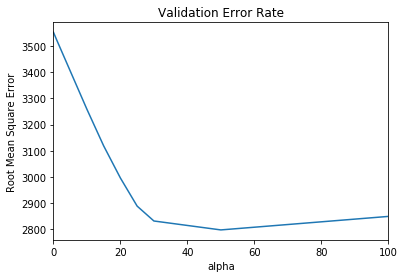

In [100]:
#Lasso Regression

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV,Lasso
from sklearn.model_selection import cross_val_score

#choosing set of alpha values to try
alphas = [0,0.00001,0.001,0.005,0.01,0.02,0.03,0.04,0.05, 0.1,0.2,0.3,0.4,0.5,1,10,15,20,25,30,50,100]

#Caluculation of root mean square error for different sets of alpha.
#This is done to use the effective shrinkage parameter alpha

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model,independent_variables,y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

#calculation of mean of the average squared error for each alpha for Ridge Regression
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean()  for alpha in alphas]

#indexing the cross validation errors with alpha value
cv_lasso = pd.Series(cv_lasso, index = alphas)

#Plotting error against alpha to choose the best one
cv_lasso.plot(title = "Validation Error Rate")
plt.xlabel("alpha")
plt.xlim(0,100)
plt.ylabel("Root Mean Square Error")
print(color.BOLD+ 'The optimum shrinkage parameter for Lasso Regression value looks like a value very close to 100')

#Lasso Regression
model_lasso = LassoCV(alphas =[50]).fit(independent_variables,y)
print(color.BOLD+"The mean square error is "+ str(rmse_cv(model_lasso).mean()))
print(' \n ')

print(color.BOLD+'The selected variables using LASSO regression are ')
coef = pd.Series(model_lasso.coef_, index = independent_variables.columns)
coef[coef !=0 ]

In [113]:
selected_lasso_variables=coef.index
filtered_independent_variables=independent_variables[coef.index]
Final_df=pd.concat([filtered_independent_variables,y],axis=1)
print(color.BOLD+color.RED+'The final dataset for analysis')
Final_df.head()

The final dataset for analysis


,carwidth,curbweight,enginesize,boreratio,horsepower,mileage,two,hatchback,sedan,wagon,fwd,rwd,others,Highend,Medium,5 and 6,above 6,below 4,price
0,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.599325,1,0,0,0,0,1,1,0,1,0,0,0,13495
1,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.599325,1,0,0,0,0,1,1,0,1,0,0,0,16500
2,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.824897,1,1,0,0,0,1,1,0,1,1,0,0,16500
3,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.148181,0,0,1,0,1,0,0,0,1,0,0,0,13950
4,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.200850,0,0,1,0,0,0,0,0,1,1,0,0,17450


### <font color="maroon"> Splitting the data into Train and Test Datasets

In [114]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(Final_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#Defining Target variable for the training data set
Y_train = df_train.pop('price')
X_train = df_train

#Defining Target variable for the training data set
Y_test = df_test.pop('price')
X_test = df_test

### <font color="maroon">Buidling the Linear Regression model using Recursive Feature Elimination 

In [115]:
from sklearn.feature_selection import RFE # Importing recursive feature elimination (stepwise)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

Regression_model = LinearRegression()
Regression_model.fit(X_train,Y_train)

# #Performing recursive feature eliminate to choose top 10 features
rfe = RFE(Regression_model, 10)
rfe = rfe.fit(X_train, Y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
print('The selected columns after recursive feature elimination are')
X_train.columns[rfe.support_]

The selected columns after recursive feature elimination are


Index(['carwidth', 'curbweight', 'horsepower', 'hatchback', 'sedan', 'wagon',
       'Highend', 'Medium', '5 and 6', 'below 4'],
      dtype='object')

In [116]:
#Subsetting the data using the selected variables
X_train=df_train[['carwidth', 'curbweight', 'horsepower', 'hatchback', 'sedan', 'wagon','Highend', 'Medium', '5 and 6', 'below 4']]

### Implementing Regression Model in statmodels

In [127]:
X = sm.add_constant(X_train) #Adding the constant
lm = sm.OLS(Y_train,X).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           7.89e-72
Time:                        11:20:00   Log-Likelihood:                -1292.1
No. Observations:                 143   AIC:                             2606.
Df Residuals:                     132   BIC:                             2639.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.437e+04    923.293     15.559      0.0

### <font color="maroon"> Assumptions of Linear Regression Model

####  1. Errors are normally distributed

Text(0.5, 0, 'Errors')

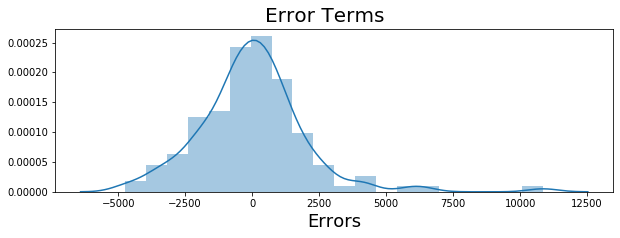

In [145]:
#predicted price by using the input independent variables
Y_train_pred=lm.predict(X)

#Residual is the difference between the actual and predicted values
residuals=Y_train-Y_train_pred

fig = plt.figure(figsize=(10,3))
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)       
plt.xlabel('Errors', fontsize = 18)   

#### 2. No heteroskedasticity (homoskedasticity) 

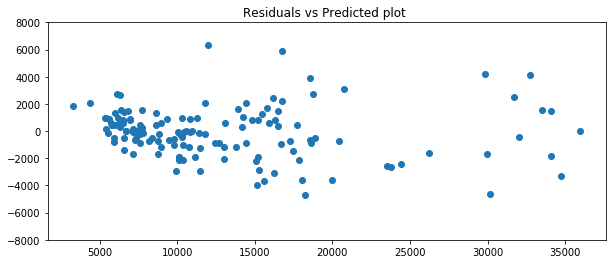

In [155]:
#Fitting the model on the test data
plt.figure(figsize=(10,4))
plt.scatter(Y_train_pred,residuals)
plt.ylim(-8000,8000)
plt.title('Residuals vs Predicted plot ')
plt.show()

#### 3. No Multicollinearity among the independent variables

In [156]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

print(color.BOLD+color.RED+'The Variance Inflation Factor for the selected variables are ')
checkVIF(X_train)

The Variance Inflation Factor for the selected variables are 


,Features,VIF
1,curbweight,7.07
0,carwidth,4.69
2,horsepower,3.04
4,sedan,2.24
7,Medium,2.15
6,Highend,2.13
8,5 and 6,2.01
3,hatchback,1.58
5,wagon,1.29
9,below 4,1.19


#### 4. Errors are uncorrelated 
        
        * Visually        - sequence plot
        * Statistically   - Durbin watson statistic 
                            ( Value between 1.5 and 2.5 means the errors are uncorrelated)

In [161]:
from statsmodels.stats.stattools import durbin_watson
d_w=durbin_watson(residuals)
print('The Durbin watson statistic is ' +str(round(d_w,2)))

The Durbin watson statistic is 1.93


### <font color="blue"> Fitting the model on the test data

In [166]:
X_test

,const,carwidth,curbweight,enginesize,boreratio,horsepower,mileage,two,hatchback,sedan,wagon,fwd,rwd,others,Highend,Medium,5 and 6,above 6,below 4
160,1.0,-0.704593,-0.888637,-0.695874,-0.517266,-0.864871,2.182731,0,0,1,0,1,0,0,0,0,0,0,0
186,1.0,-0.190566,-0.540164,-0.431076,-0.517266,-0.484619,0.378154,0,0,1,0,1,0,0,0,1,0,0,0
59,1.0,0.276731,-0.328385,-0.118132,0.222975,-0.509970,0.152582,1,1,0,0,1,0,0,0,1,0,0,0
165,1.0,-0.891512,-0.559417,-0.695874,-0.332206,0.199833,-0.072990,1,0,1,0,0,1,1,0,0,0,0,0
140,1.0,-0.984972,-0.607548,-0.455148,1.074252,-0.788820,0.077391,1,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,1.0,-0.611134,-0.039595,-0.118132,0.037915,-0.408569,-0.148181,0,0,0,1,1,0,0,0,0,0,0,0
29,1.0,0.183272,0.491779,0.700337,1.000228,1.036386,-0.975278,1,1,0,0,1,0,0,0,0,0,0,0
182,1.0,-0.190566,-0.567118,-0.719947,-1.183483,-1.321172,2.032349,1,0,1,0,1,0,0,0,1,0,0,0
40,1.0,-1.592458,-0.353413,-0.407003,-0.665314,-0.459269,0.302963,0,0,1,0,1,0,0,0,0,0,0,0


In [180]:
#predicted price by using the input independent variables

#Subsetting the data using the selected variables
X_test=df_test[['carwidth', 'curbweight', 'horsepower', 'hatchback', 'sedan', 'wagon','Highend', 'Medium', '5 and 6', 'below 4']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test)
y_pred = lm.predict(X_test_new)

from sklearn.metrics import r2_score 

R_square=r2_score(Y_test, y_pred)
print(color.BOLD+color.RED+'The R-square on the test data is ' +str(round((R_square)*100,2))+' %')

The R-square on the test data is 90.25 %
